# Notebook 3: Bivariate Analysis

In this notebook, all categorical and numerical variables will be analized against the target variable (Alzheimer's diagnosis = categorical variable)


#### Table of contents:
* [Categorical variables vs DX](#categorical-variables)
    * [Main](#categorical-main_data)
    * [Biomarkers](#categorical-biomarker_data)
    * [Adni](#categorical-adni_data) 
* [Numerical variables vs DX](#numerical-variables)
    * [Main](#numerical-main_data)
    * [Biomarkers](#numerical-biomarker_data)
    * [Adni](#numerical-adni_data)  

## Imports

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
# Gets src path 
src_path = os.path.dirname(os.getcwd())

# Adds src_path if it doesn't exist in sys.path (to access utils)
if os.path.exists(src_path) and src_path not in sys.path:
    sys.path.append(src_path)
    
import utils.data_tools as dt
import utils.viz_tools as vt

In [3]:
# Load datasets

df_main = pd.read_csv('../data/processed/main_data.csv')
df_bm = pd.read_csv('../data/processed/biomarker_data.csv')
df_adni = pd.read_csv('../data/processed/adni_clean_data.csv')

In [4]:
palette = ['#b4d5ff', '#432786', '#9694DB', '#772183', '#C46CBE']

## Categorical variables

Comparison of target variable with the rest of categorical variables.
  
In order to have a better visual comparison, I'll use the relative frequencies in all cases.

### Categorical main_data

[Back to top](#table-of-contents)

In [5]:
main_classification = dt.classify_by_cardinality(df_main)
column_selection = main_classification.loc[main_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_main = column_selection.index.to_list()

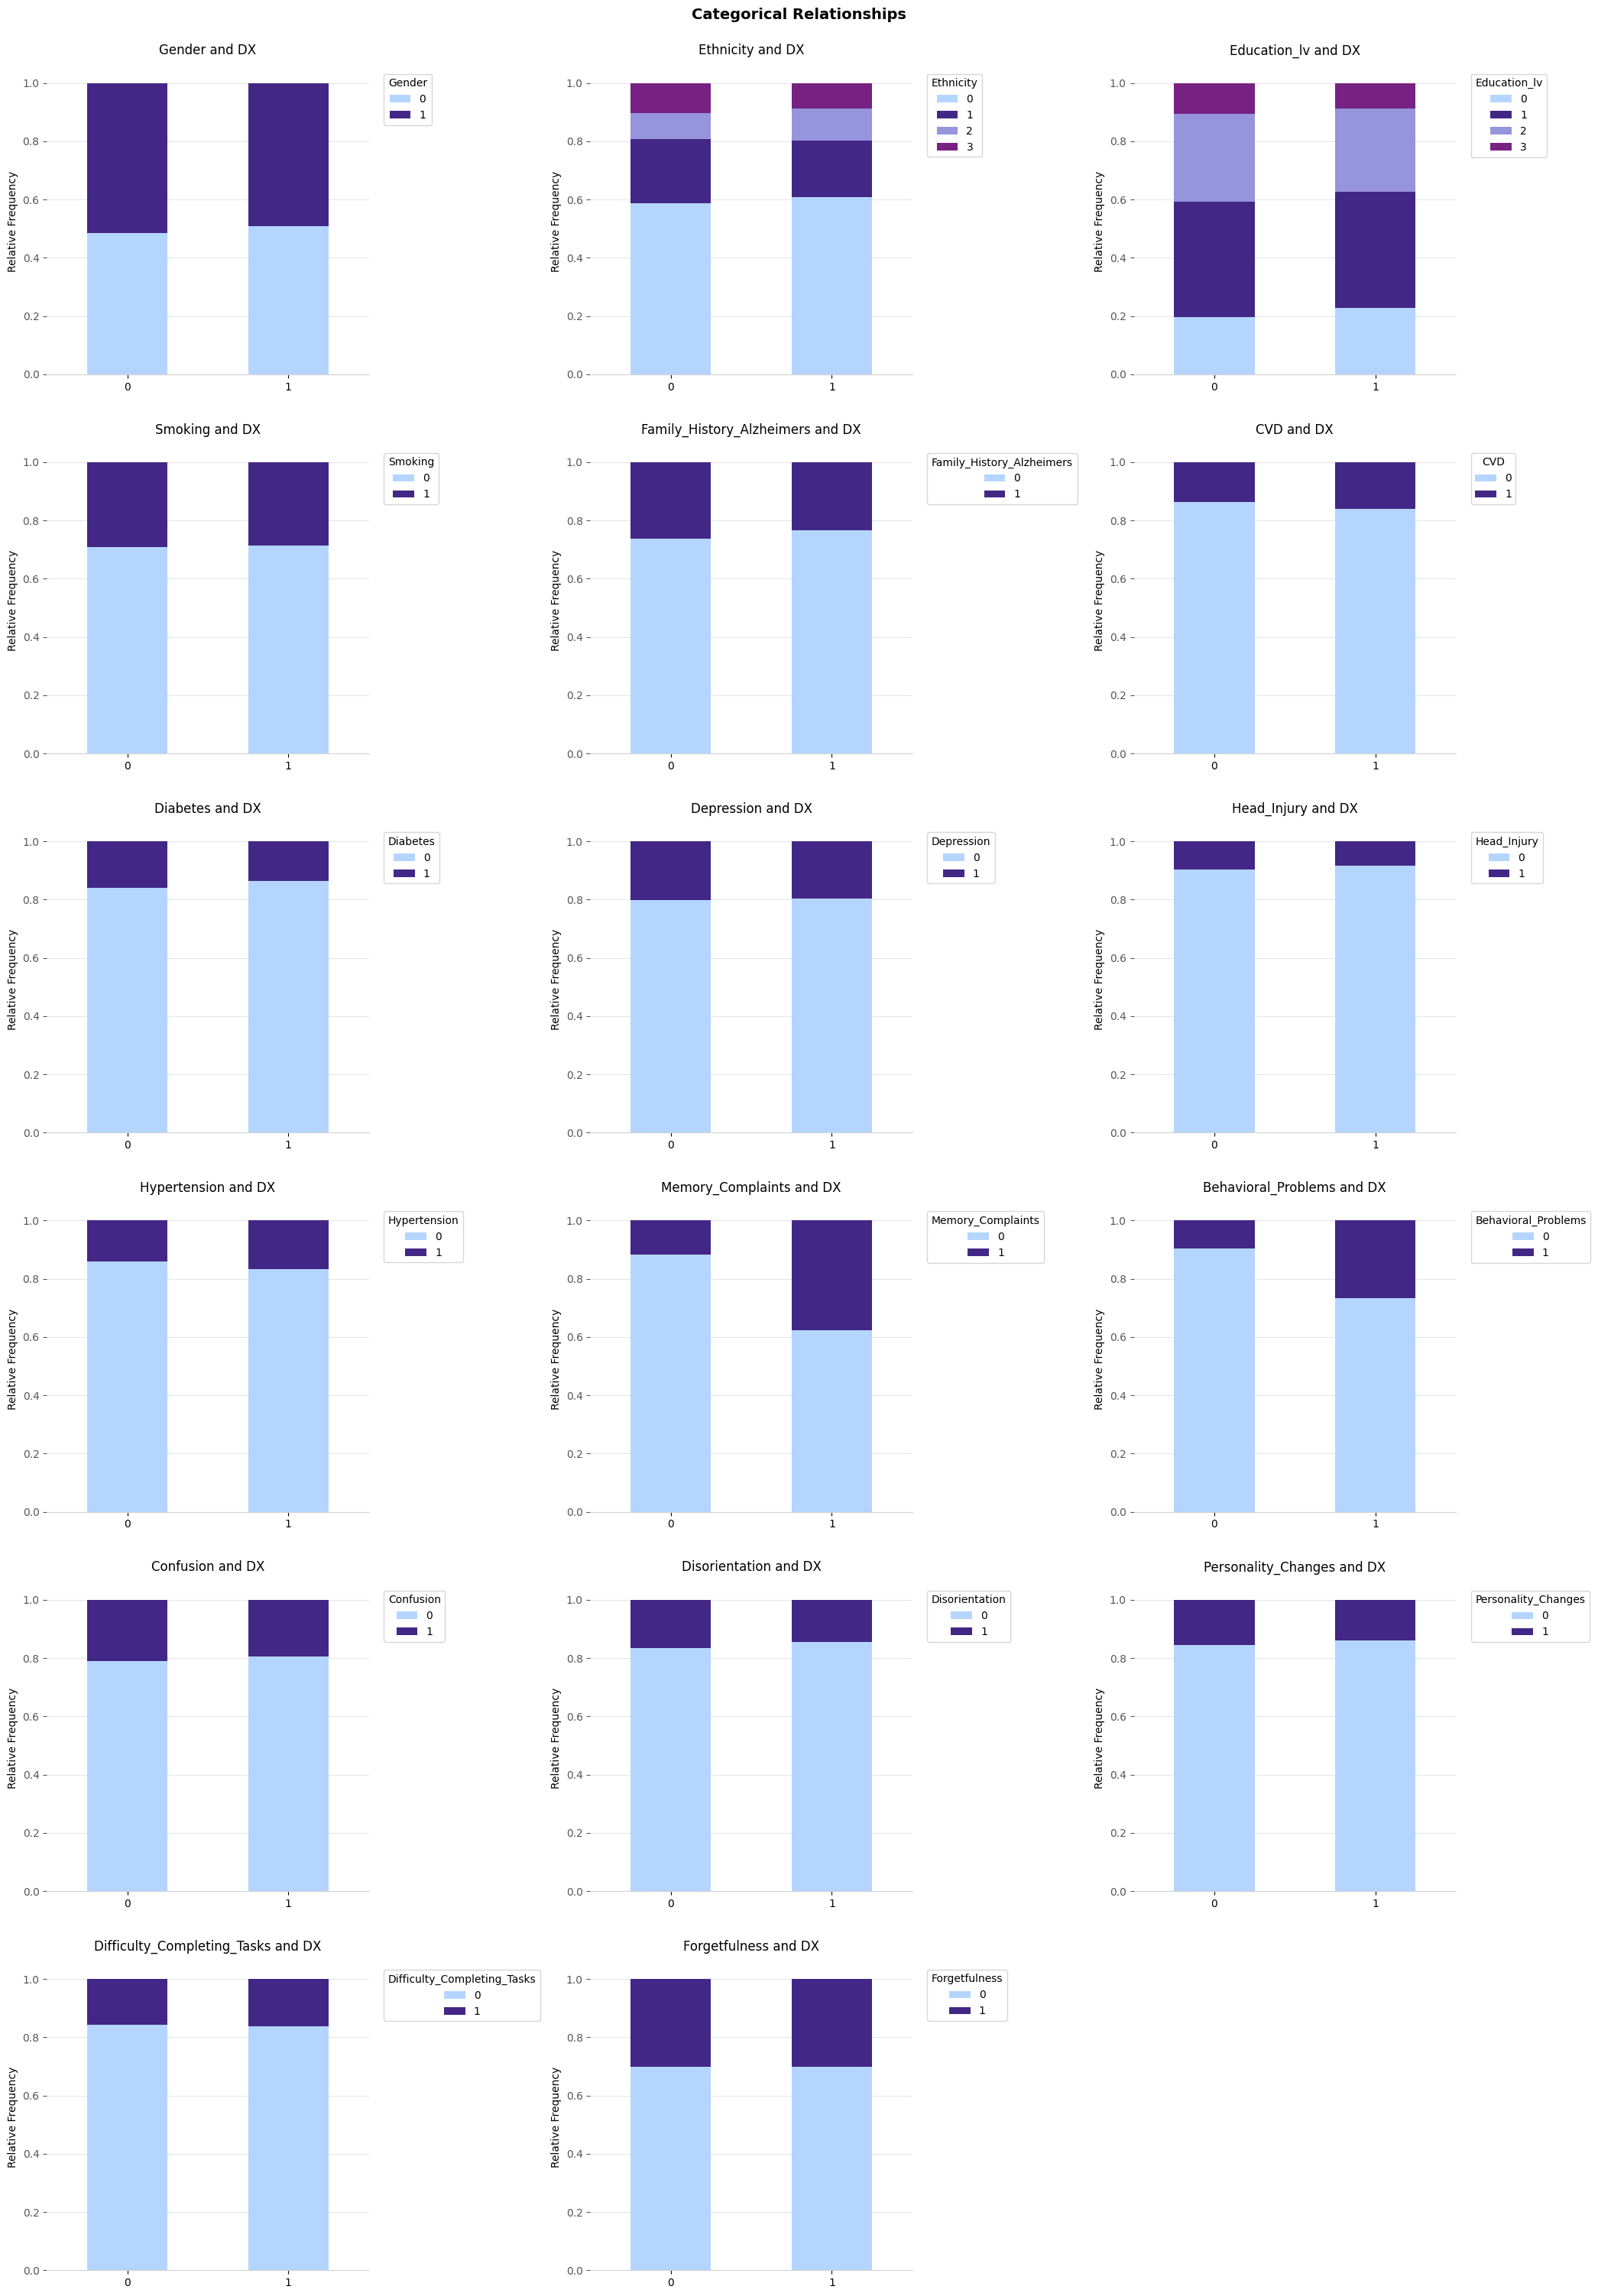

In [6]:
vt.plot_categorical_relationship_stacked(df_main, 'DX', categorical_main, relative = True, palette = palette);

It seems as if Memory_Complaints and Behavioral_Problems are the only variables with some correlation with AD diagnosis.  

Let's confirm this with some statistical tests.

In [7]:
dt.categorical_correlation_test(df_main, 'DX', categorical_main)

,chi2,p_value,dof,expected,significant
Forgetfulness,0.000000,1.000000e+00,1,"[[970.1670544439274, 418.8329455560726], [530....",False
Smoking,0.030887,8.604932e-01,1,"[[988.2647743136342, 400.73522568636577], [540...",False
Depression,0.047019,8.283335e-01,1,"[[1110.4243834341555, 278.5756165658446], [607...",False
Difficulty_Completing_Tasks,0.128631,7.198557e-01,1,"[[1168.5956258724989, 220.40437412750117], [63...",False
Confusion,0.694786,4.045414e-01,1,"[[1103.9609120521172, 285.03908794788276], [60...",False
Personality_Changes,0.797783,3.717571e-01,1,"[[1179.5835272219638, 209.4164727780363], [645...",False
Head_Injury,0.836768,3.603227e-01,1,"[[1260.3769194974407, 128.62308050255933], [68...",False
Gender,0.859716,3.538183e-01,1,"[[685.7743136342485, 703.2256863657515], [375....",False
Disorientation,1.168140,2.797838e-01,1,"[[1169.2419730107026, 219.75802698929735], [63...",False
Education_lv,4.453147,2.165077e-01,3,"[[288.2708236389018, 551.9804560260586, 411.07...",False


In [8]:
dt.categorical_correlation_test(df_main, 'DX', categorical_main, significant_only = True)

,chi2,p_value,dof,expected,significant
Behavioral_Problems,106.879217,4.731447e-25,1,"[[1171.181014425314, 217.8189855746859], [640....",True
Memory_Complaints,200.623704,1.526605e-45,1,"[[1100.0828292228944, 288.91717077710564], [60...",True


For both variables, p-value seems to be way below 0.05.

### Categorical biomarker_data

[Back to top](#table-of-contents)

In [9]:
bm_classification = dt.classify_by_cardinality(df_bm)
column_selection = bm_classification.loc[bm_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_bm = column_selection.index.to_list()

In [10]:
bm_temp = df_bm.copy()
bm_temp.loc[bm_temp['DX'].isin(['CU', 'MCI']), 'DX'] = 0
bm_temp.loc[bm_temp['DX'] == 'AD', 'DX'] = 1


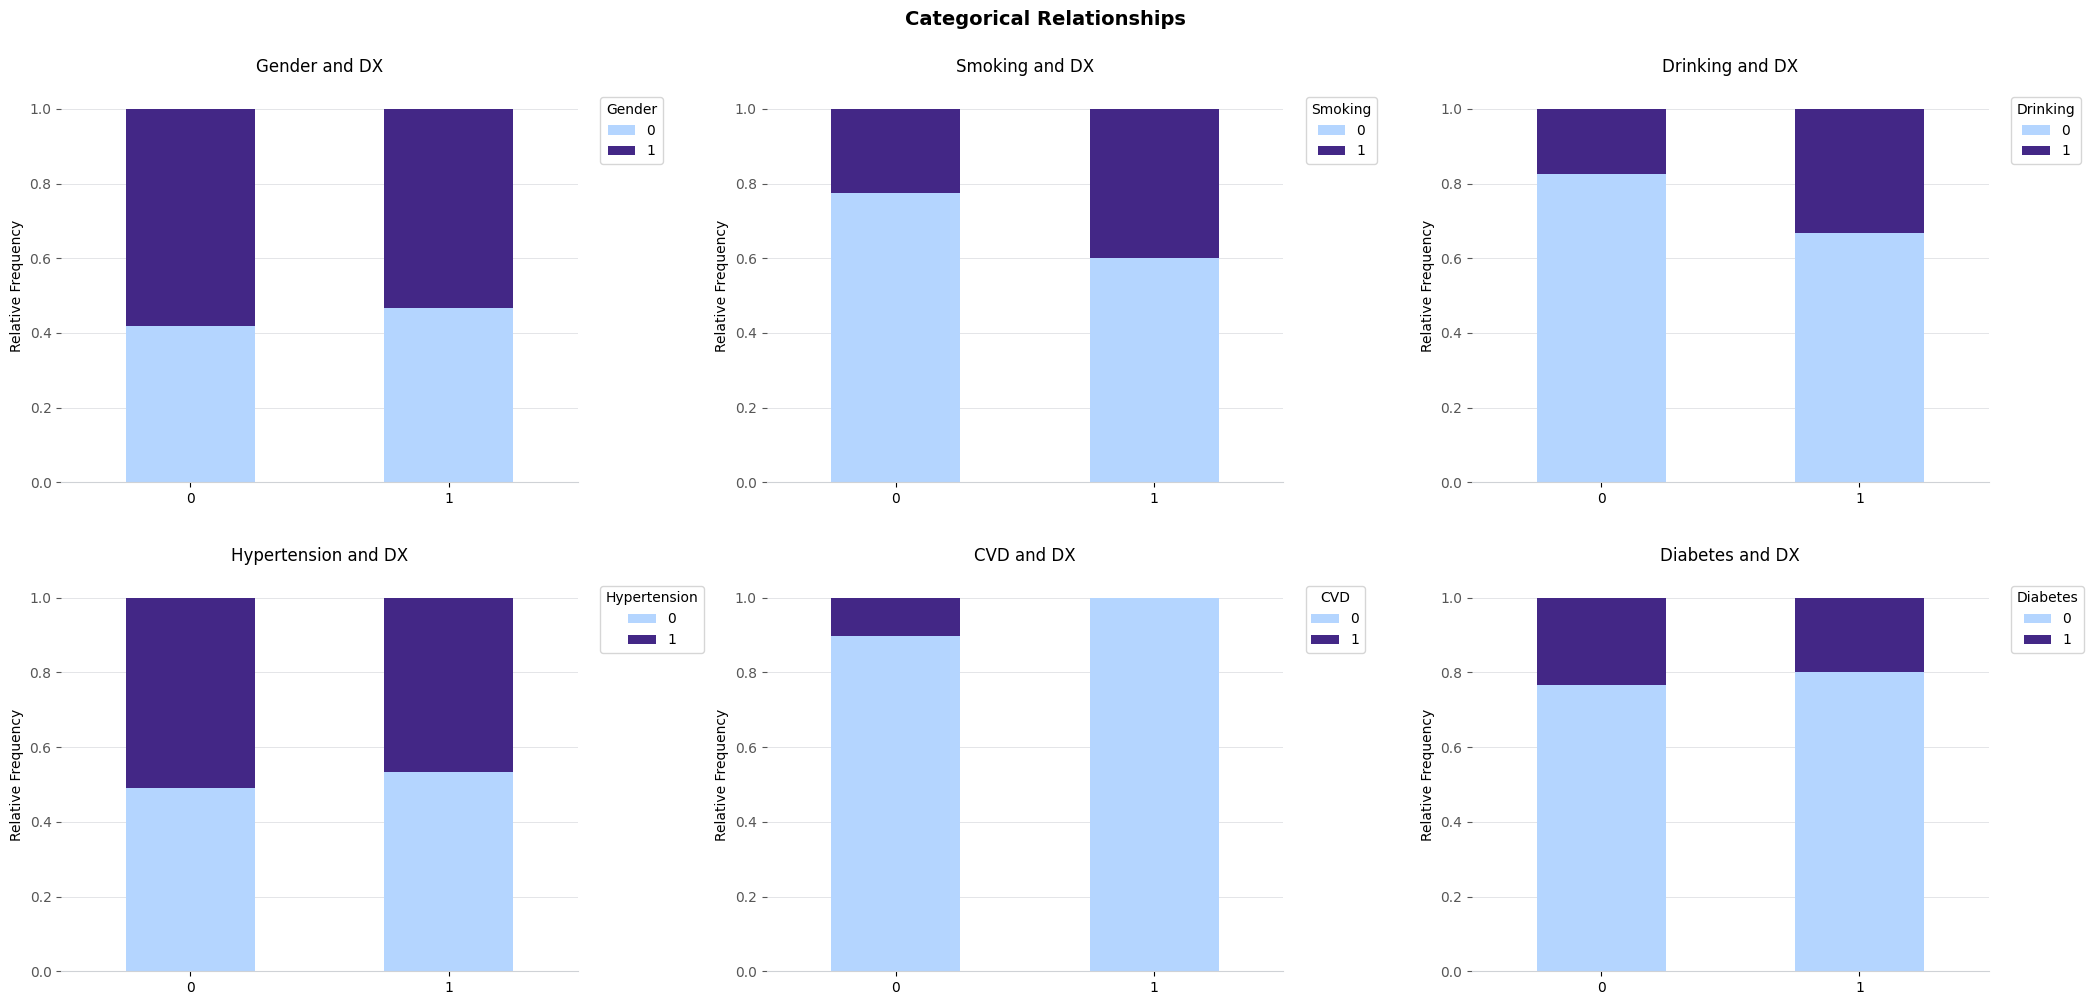

In [11]:
vt.plot_categorical_relationship_stacked(bm_temp, 'DX', categorical_bm, relative = True, palette = palette);

In [12]:
dt.categorical_correlation_test(bm_temp, 'DX', categorical_bm)

,chi2,p_value,dof,expected,significant
Diabetes,0.000000,1.000000,1,"[[75.45132743362832, 22.548672566371682], [11....",False
Hypertension,0.001355,0.970640,1,"[[48.56637168141593, 49.43362831858407], [7.43...",False
Gender,0.005180,0.942623,1,"[[41.6283185840708, 56.3716814159292], [6.3716...",False
CVD,0.652450,0.419238,1,"[[89.32743362831859, 8.672566371681416], [13.6...",False
Drinking,1.223414,0.268692,1,"[[78.92035398230088, 19.079646017699115], [12....",False
Smoking,1.311397,0.252142,1,"[[73.71681415929204, 24.283185840707965], [11....",False


In [13]:
dt.categorical_correlation_test(bm_temp, 'DX', categorical_bm, significant_only = True)

,chi2,p_value,dof,expected,significant


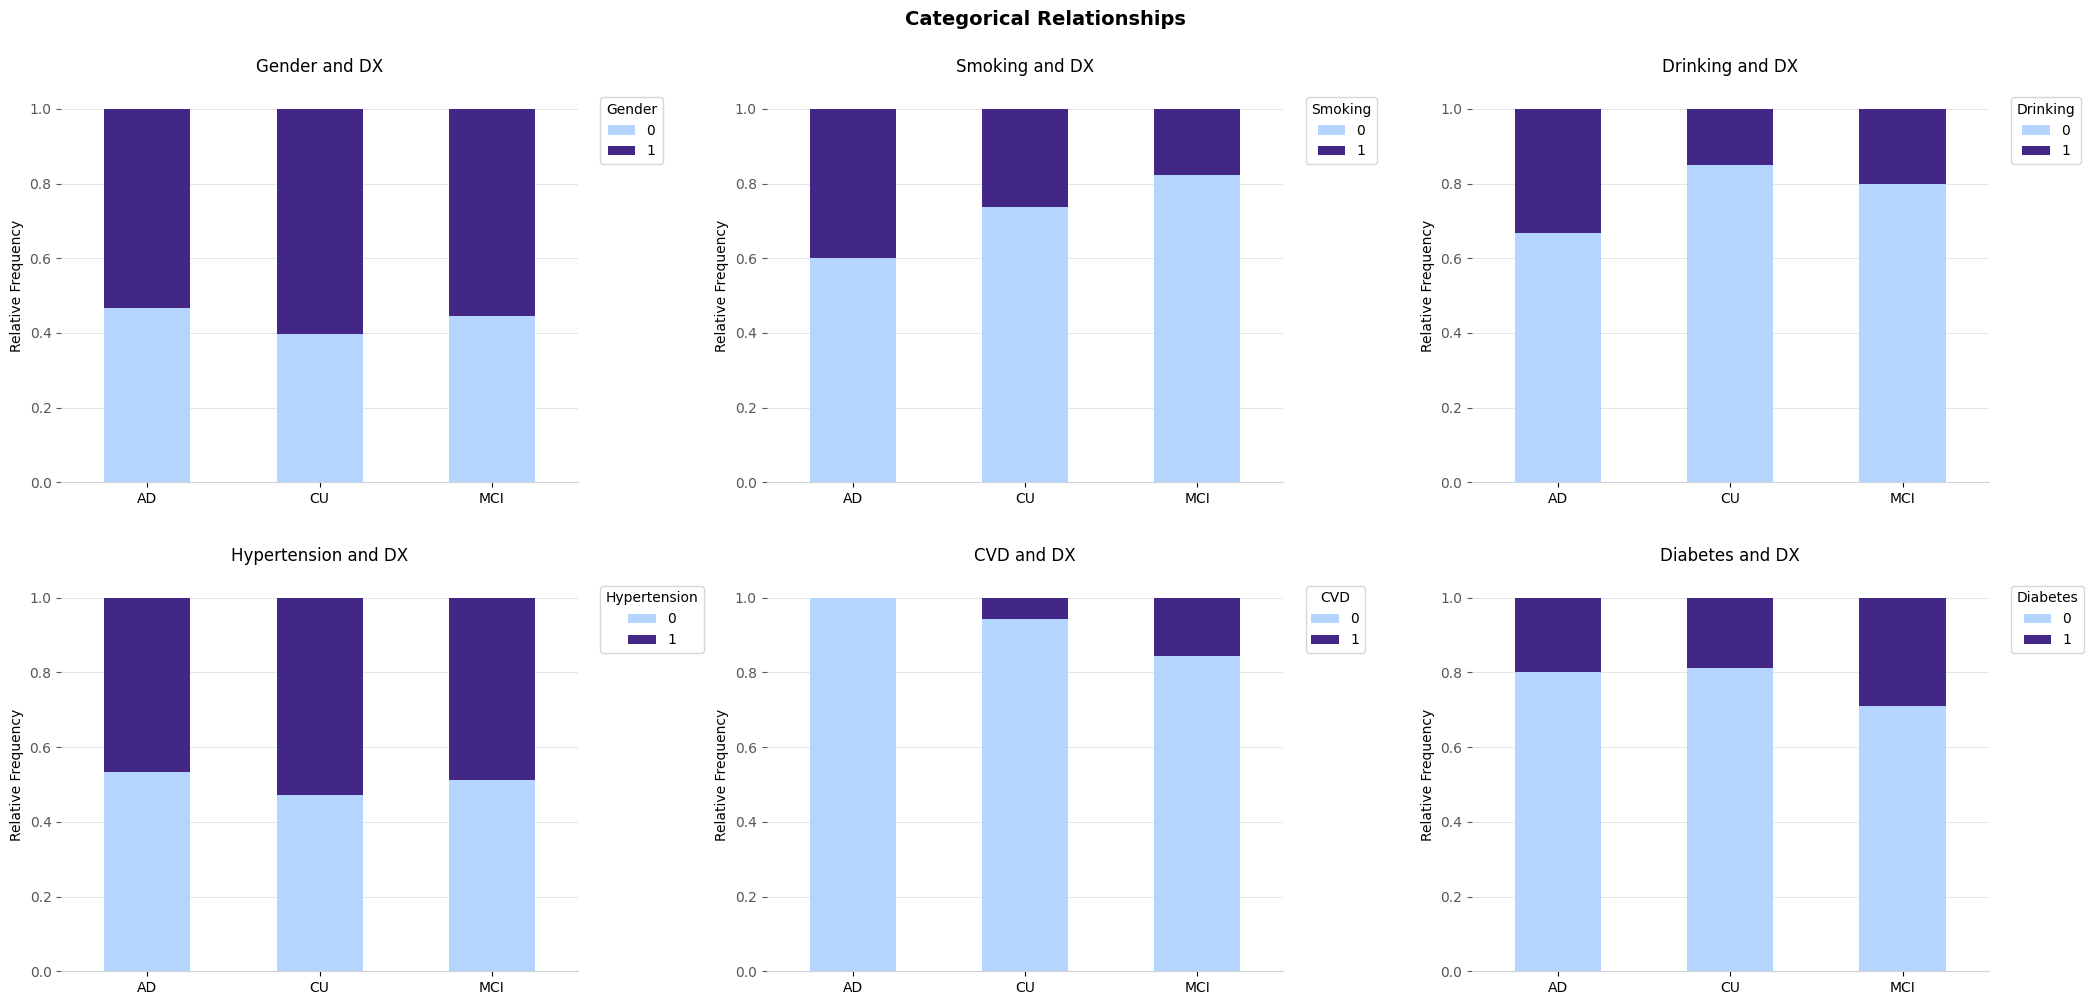

In [14]:
vt.plot_categorical_relationship_stacked(df_bm, 'DX', categorical_bm, relative = True, palette = palette);

In [15]:
dt.categorical_correlation_test(df_bm, 'DX', categorical_bm)

,chi2,p_value,dof,expected,significant
Hypertension,0.249870,0.882554,2,"[[7.433628318584071, 7.566371681415929], [26.2...",False
Gender,0.355771,0.837038,2,"[[6.371681415929204, 8.628318584070797], [22.5...",False
Diabetes,1.467967,0.479993,2,"[[11.548672566371682, 3.4513274336283186], [40...",False
Drinking,2.494024,0.287362,2,"[[12.079646017699115, 2.920353982300885], [42....",False
Smoking,3.124018,0.209714,2,"[[11.283185840707965, 3.7168141592920354], [39...",False
CVD,4.633343,0.098601,2,"[[13.672566371681416, 1.3274336283185841], [48...",False


In [16]:
dt.categorical_correlation_test(df_bm, 'DX', categorical_bm, significant_only = True)

,chi2,p_value,dof,expected,significant


It seems there is no correlation in between AD diagnosis and these variables, which reinforces the findings in main_data shown before

### Categorical adni_data

[Back to top](#table-of-contents)

In [17]:
adni_classification = dt.classify_by_cardinality(df_adni)
column_selection = adni_classification.loc[adni_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_adni = column_selection.index.to_list()

In [18]:
adni_temp = df_adni.copy()
adni_temp.loc[adni_temp['DX'].isin(['CU', 'MCI']), 'DX'] = 0
adni_temp.loc[adni_temp['DX'] == 'AD', 'DX'] = 1

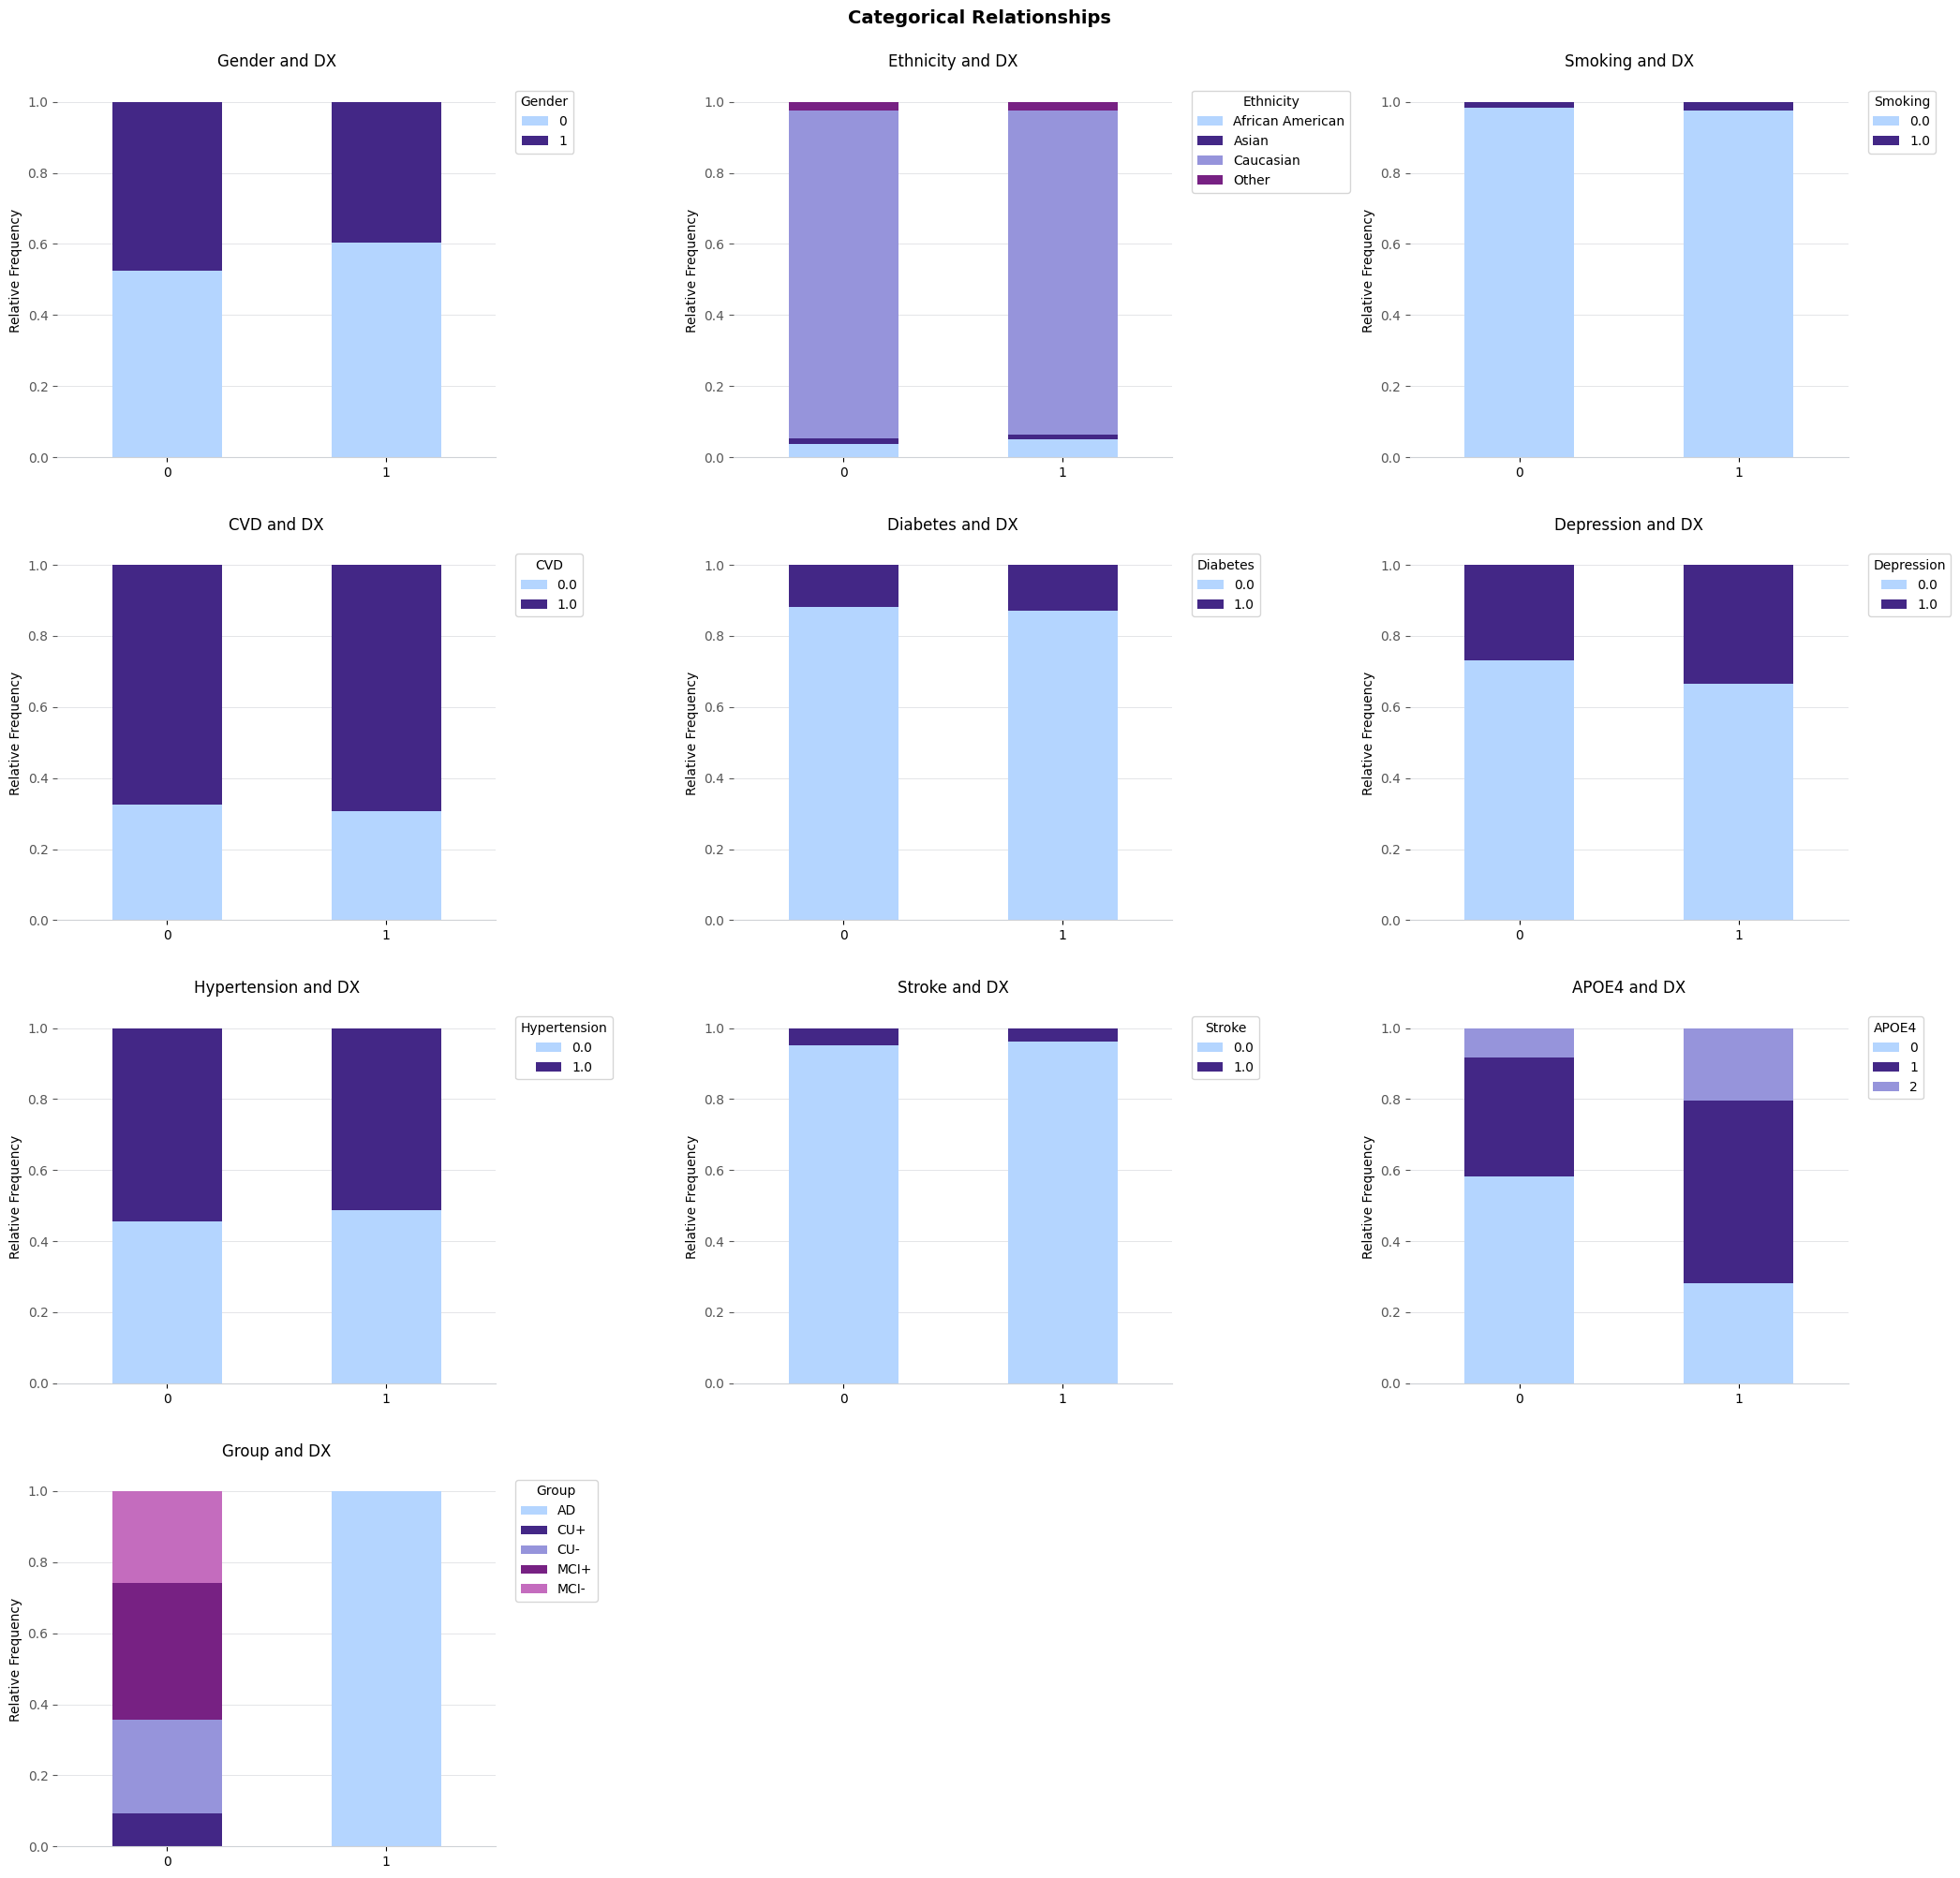

In [19]:
vt.plot_categorical_relationship_stacked(adni_temp, 'DX', categorical_adni, relative = True, palette = palette);

In [20]:
dt.categorical_correlation_test(adni_temp, 'DX', categorical_adni)

,chi2,p_value,dof,expected,significant
Diabetes,0.001404,9.701113e-01,1,"[[493.39906103286387, 67.60093896713614], [68....",False
Ethnicity,0.359800,9.484158e-01,3,"[[21.948356807511736, 7.901408450704225, 517.1...",False
Stroke,0.008562,9.262752e-01,1,"[[534.6619718309859, 26.338028169014084], [74....",False
Smoking,0.021351,8.838261e-01,1,"[[551.3427230046948, 9.657276995305164], [76.6...",False
CVD,0.027857,8.674452e-01,1,"[[180.8544600938967, 380.1455399061033], [25.1...",False
Hypertension,0.176999,6.739649e-01,1,"[[257.23474178403757, 303.76525821596243], [35...",False
Depression,1.105868,2.929818e-01,1,"[[405.6056338028169, 155.3943661971831], [56.3...",False
Gender,1.394852,2.375873e-01,1,"[[299.3755868544601, 261.6244131455399], [41.6...",False
APOE4,27.859754,8.919310e-07,2,"[[305.5211267605634, 201.04694835680752, 54.43...",True
Group,639.000000,5.607136e-137,4,"[[68.47887323943662, 45.652582159624416, 129.9...",True


In [21]:
dt.categorical_correlation_test(adni_temp, 'DX', categorical_adni, significant_only = True)

,chi2,p_value,dof,expected,significant
APOE4,27.859754,8.919310e-07,2,"[[305.5211267605634, 201.04694835680752, 54.43...",True
Group,639.000000,5.607136e-137,4,"[[68.47887323943662, 45.652582159624416, 129.9...",True


In the source dataset, subjets with positive Aβ-related pathological changes (CU+ and MCI+). CU+ subjects were regarded as patients with pre-clinical AD and MCI+ subjects were regarded as patients with prodromal AD.  

***Does regarding CU+ and MCI+ individuals as having AD change this relationships?***

In [22]:
adni_temp.loc[adni_temp['Group'].isin(['CU+', 'MCI+']), 'DX'] = 1

In [23]:
adni_temp.DX.value_counts()

DX
1    346
0    293
Name: count, dtype: int64

In [24]:
df_adni.DX.value_counts()

DX
MCI    361
CU     200
AD      78
Name: count, dtype: int64

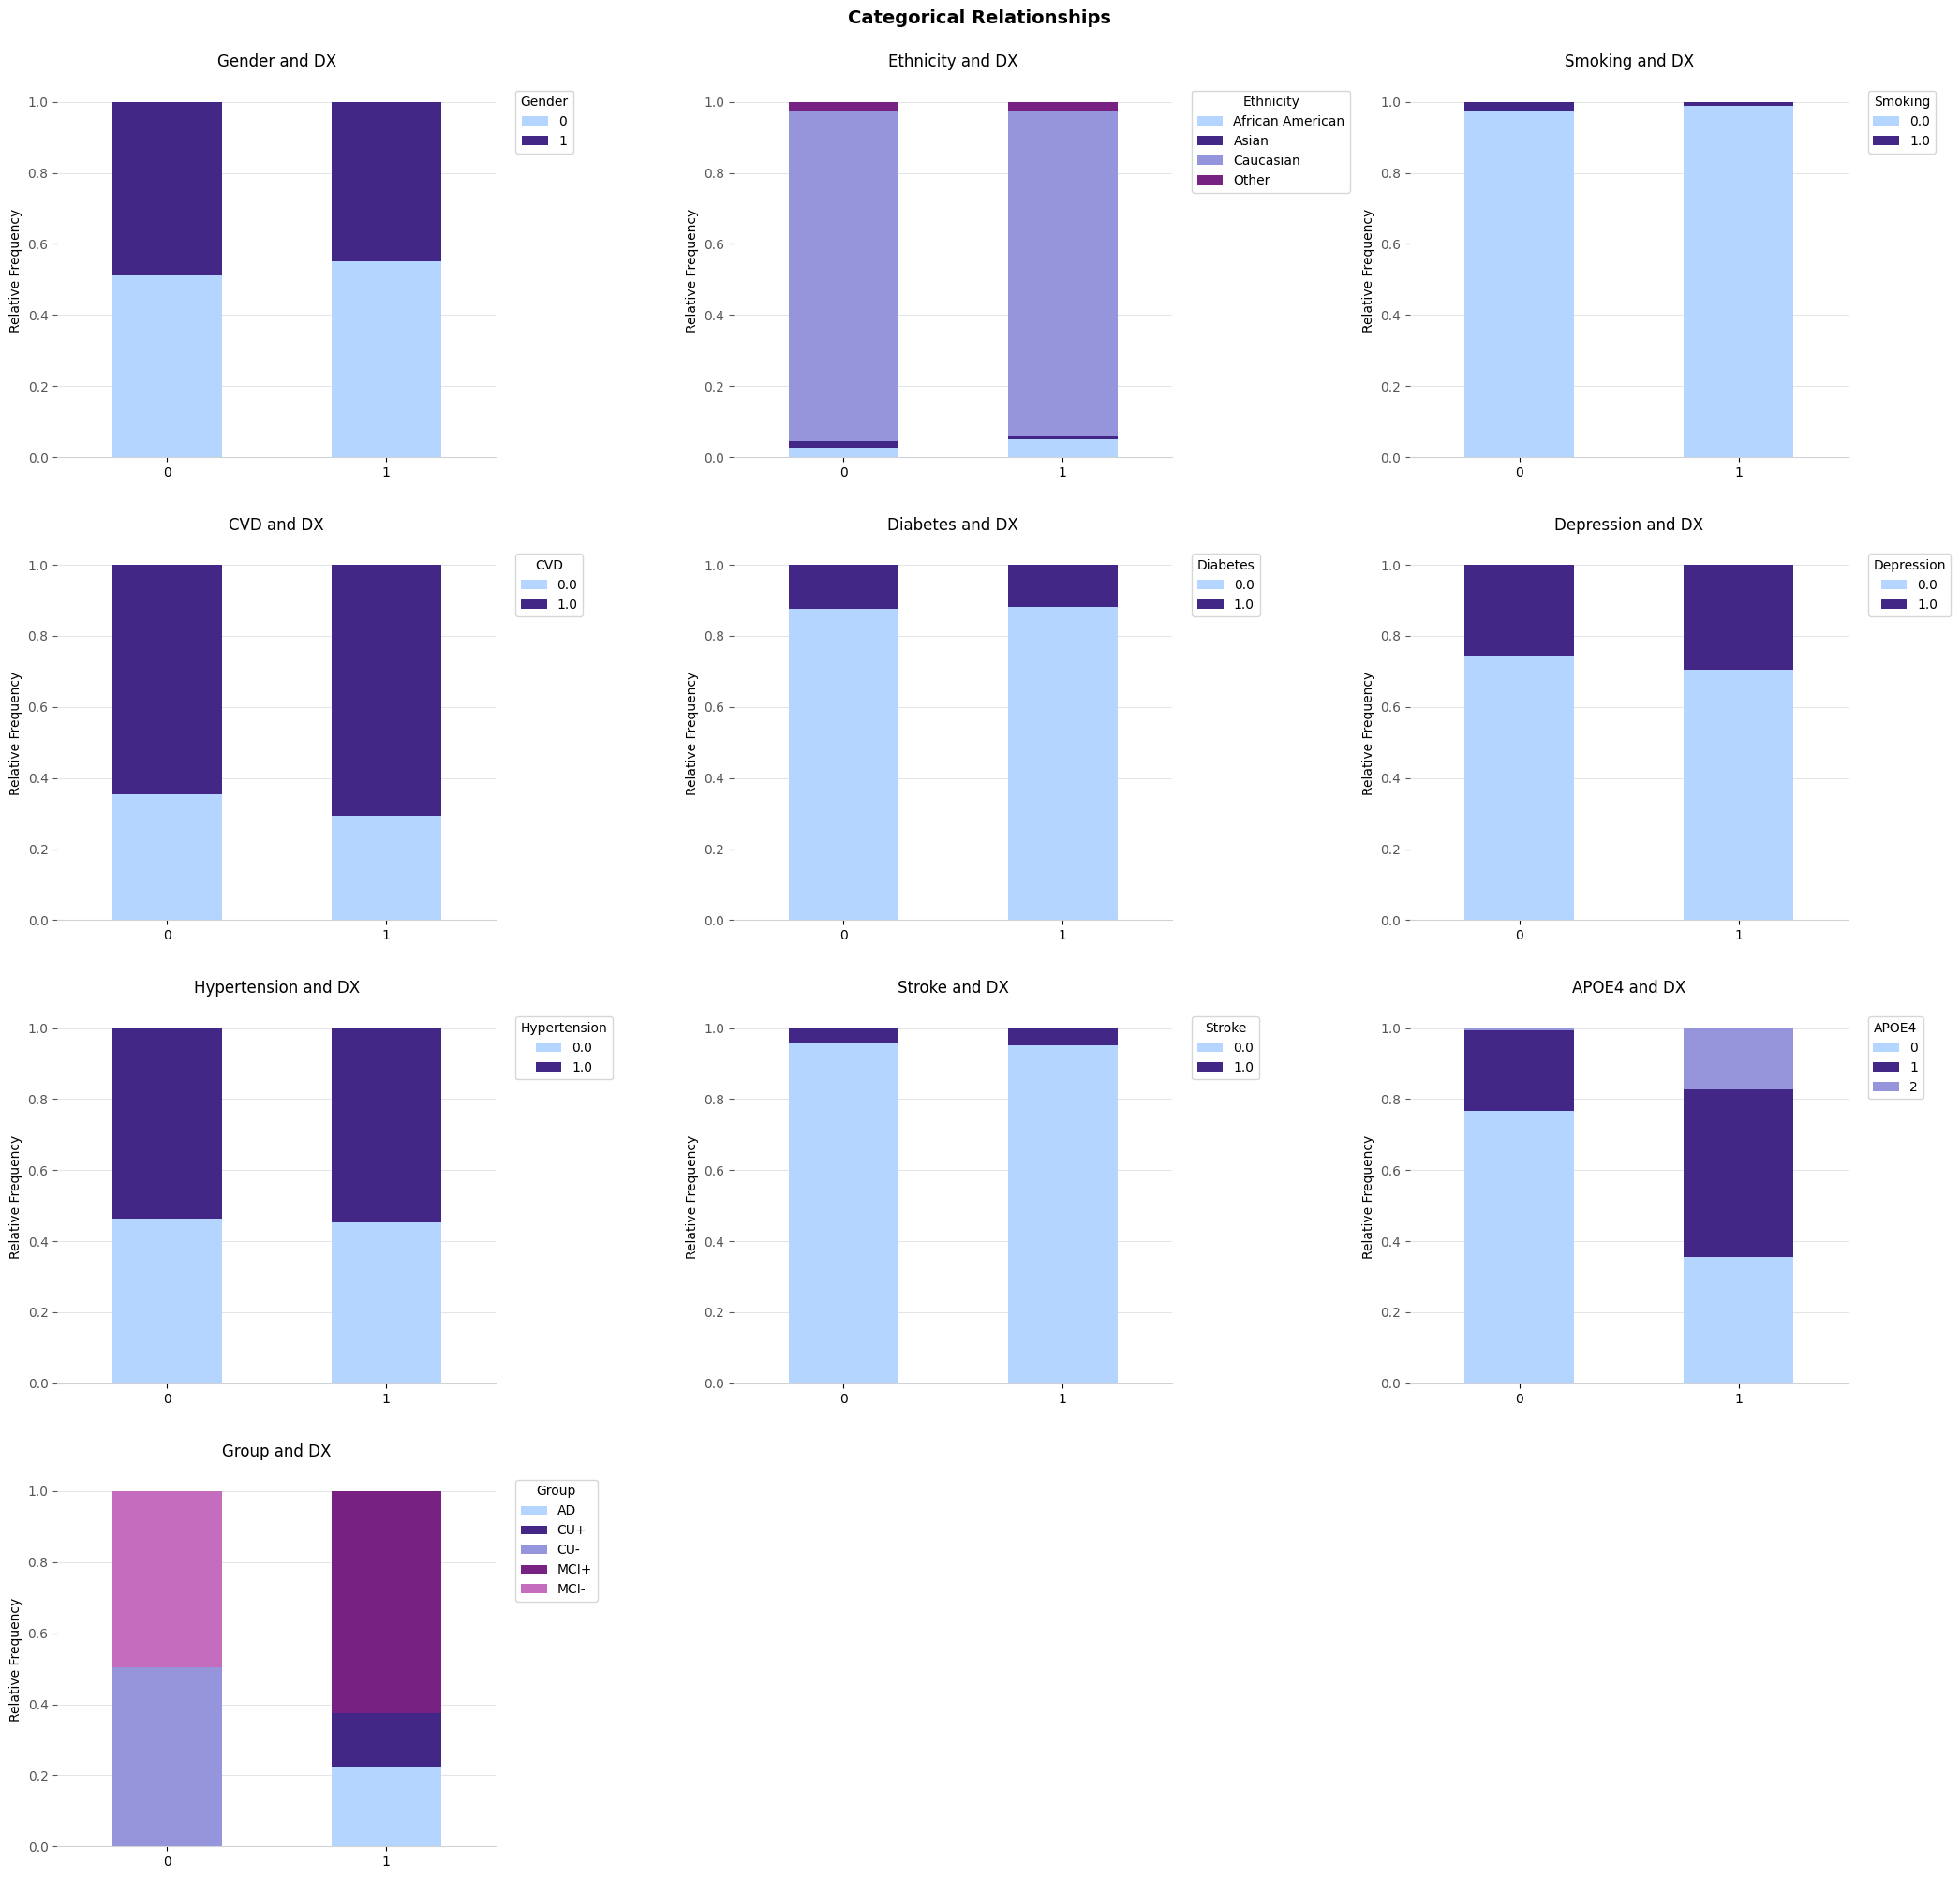

In [25]:
vt.plot_categorical_relationship_stacked(adni_temp, 'DX', categorical_adni, relative = True, palette = palette);

In [26]:
dt.categorical_correlation_test(adni_temp, 'DX', categorical_adni)

,chi2,p_value,dof,expected,significant
Diabetes,0.002222,9.624066e-01,1,"[[257.69327073552427, 35.30672926447574], [304...",False
Stroke,0.009223,9.234932e-01,1,"[[279.24413145539904, 13.755868544600938], [32...",False
Hypertension,0.033634,8.544875e-01,1,"[[134.34898278560252, 158.65101721439748], [15...",False
Ethnicity,2.360639,5.010038e-01,3,"[[11.463223787167449, 4.126760563380282, 270.0...",False
Smoking,0.790019,3.740944e-01,1,"[[287.9561815336463, 5.043818466353677], [340....",False
Gender,0.869245,3.511644e-01,1,"[[156.35837245696402, 136.64162754303598], [18...",False
Depression,1.008135,3.153500e-01,1,"[[211.84037558685446, 81.15962441314554], [250...",False
CVD,2.359567,1.245168e-01,1,"[[94.45696400625978, 198.54303599374023], [111...",False
APOE4,121.683127,3.774372e-27,2,"[[159.56807511737088, 105.00312989045383, 28.4...",True
Group,639.000000,5.607136e-137,4,"[[35.76525821596244, 23.843505477308295, 67.86...",True


Regarding CU+ and MCI+ individuals as having AD *changes* the relationship with 'Depression', and it now aligns with the observations found in the other 2 datasets.  

It does not change the relationship between APOE4 and AD, which aligns with the current research findings regarding AD.

## Numerical variables

### Numerical main_data

[Back to top](#table-of-contents)

In [27]:
main_classification = dt.classify_by_cardinality(df_main)
column_selection = main_classification.loc[main_classification['Suggested Type'].isin(['Numerical (discrete)', 'Numerical (continuous)'])]
numerical_main = column_selection.index.to_list()
numerical_main.append('DX')

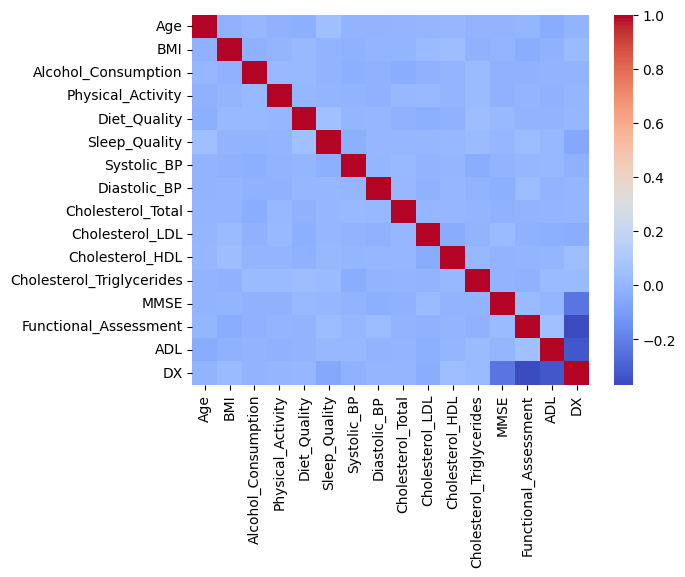

In [28]:
num_main = df_main[numerical_main]
heat_main = sns.heatmap(num_main.corr(method = 'spearman'), cmap = 'coolwarm')

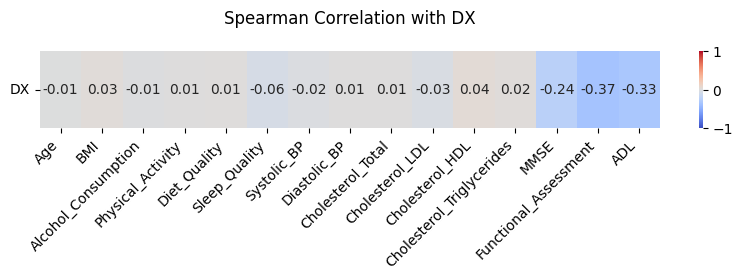

,spearman_corr,p_value,significant
Functional_Assessment,-0.366687,2.230193e-69,True
ADL,-0.330450,6.391765e-56,True
MMSE,-0.236271,1.198530e-28,True
Sleep_Quality,-0.056069,9.328805e-03,True
Cholesterol_HDL,0.042542,4.862145e-02,True


In [29]:
dt.numerical_correlation_spearman(num_main,'DX', show_heatmap = True, annot = True, significant_only = True)

As shown above, the 3 numerical variables that seem to have a relationship to the diagnosis are 'Functional_Assessment', 'ADL' and 'MMSE'.  

Let's confirm this with a Mann-Whitney U test

In [30]:
# Mann-Whitney U
dt.categorical_numerical_test(num_main, 'DX')

,u_stat,p_value,significant
Age,531471.0,7.905594e-01,False
BMI,510992.0,2.211100e-01,False
Alcohol_Consumption,533321.0,6.891866e-01,False
Physical_Activity,524081.0,7.857463e-01,False
Diet_Quality,522294.0,6.878482e-01,False
Sleep_Quality,563558.0,9.360770e-03,True
Systolic_BP,537904.0,4.634028e-01,False
Diastolic_BP,524530.5,8.109586e-01,False
Cholesterol_Total,524129.0,7.884313e-01,False
Cholesterol_LDL,548223.0,1.379332e-01,False


In [31]:
# Mann-Whitney U
dt.categorical_numerical_test(num_main, 'DX', significant_only = True)

,u_stat,p_value,significant
Sleep_Quality,563558.0,9.360770e-03,True
Cholesterol_HDL,500704.0,4.864892e-02,True
MMSE,678416.0,6.623802e-28,True
Functional_Assessment,761542.0,8.997090e-65,True
ADL,738445.0,6.053564e-53,True


Summary:

* 'Functional_Assessment', 'ADL' and 'MMSE' seem to have a statistically significant negative correlation with AD diagnosis

### Numerical biomarker_data

[Back to top](#table-of-contents)

In [32]:
bm_classification = dt.classify_by_cardinality(df_bm)
column_selection = bm_classification.loc[bm_classification['Suggested Type'].isin(['Numerical (discrete)', 'Numerical (continuous)'])]
numerical_bm = column_selection.index.to_list()
numerical_bm.append('DX')

# Transform DX column into binary
num_bm = df_bm[numerical_bm].copy()
num_bm['DX'] = num_bm['DX'].apply(lambda x: 1 if x == 'AD' else 0)

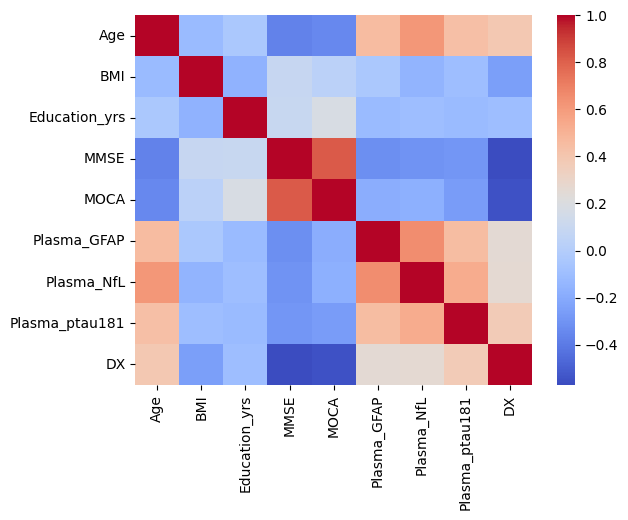

In [33]:
heat_bm = sns.heatmap(num_bm.corr(method = 'spearman',numeric_only = True),cmap = 'coolwarm')

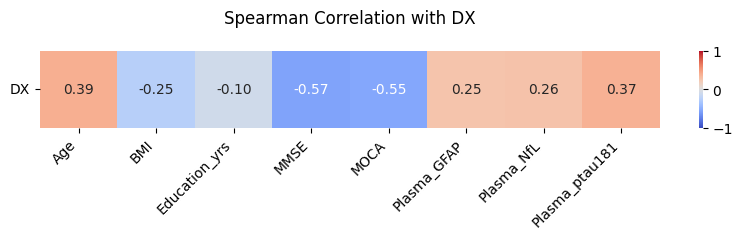

,spearman_corr,p_value,significant
MMSE,-0.570576,4.176613e-11,True
MOCA,-0.549683,2.873853e-10,True
BMI,-0.253476,6.750408e-03,True
Plasma_GFAP,0.253472,6.751237e-03,True
Plasma_NfL,0.259070,5.591893e-03,True
Plasma_ptau181,0.371812,5.017066e-05,True
Age,0.390433,1.909982e-05,True


In [34]:
dt.numerical_correlation_spearman(num_bm, 'DX', annot = True, significant_only = True)

In [35]:
# Mann-Whitney U
dt.categorical_numerical_test(num_bm, 'DX')

,u_stat,p_value,significant
Age,247.0,3.663835e-05,True
BMI,1052.0,7.399644e-03,True
Education_yrs,857.5,2.914056e-01,False
MMSE,1440.5,1.598239e-09,True
MOCA,1420.5,6.134286e-09,True
Plasma_GFAP,418.0,7.400505e-03,True
Plasma_NfL,411.0,6.190742e-03,True
Plasma_ptau181,270.0,8.471373e-05,True


In [36]:
# Mann-Whitney U
dt.categorical_numerical_test(num_bm, 'DX', significant_only = True)

,u_stat,p_value,significant
Age,247.0,3.663835e-05,True
BMI,1052.0,7.399644e-03,True
MMSE,1440.5,1.598239e-09,True
MOCA,1420.5,6.134286e-09,True
Plasma_GFAP,418.0,7.400505e-03,True
Plasma_NfL,411.0,6.190742e-03,True
Plasma_ptau181,270.0,8.471373e-05,True


Summary:

* 'MMSE', 'MOCA', 'BMI' and 'Education_yrs' seem to be negatively correlated to AD diagnosis.
* 'Age', 'Plasma_ptau181', 'Plasma_GFAP' and 'Plasma_NfL' seem to be positively correlated to AD diagnosis.
* All correlations except 'Education_yrs' seem to be statistically significant, but I'll focus on 'MMSE' and 'MOCA' for the negative correlations and 'Plasma_ptau181' and 'Age' for the positive correlations. 
  * I discarded 'BMI' because on the main dataset (which is much larger) the strength of the correlation seems to be much lower.
  * I'll put 'Plasma_GFAP' and 'Plasma_NfL' on hold, as this biomarkers don't appear in other datasets and the size of this one is small. 

### Numerical adni_data

[Back to top](#table-of-contents)

In [37]:
adni_classification = dt.classify_by_cardinality(df_adni)
column_selection = adni_classification.loc[adni_classification['Suggested Type'].isin(['Numerical (discrete)', 'Numerical (continuous)'])]
numerical_adni = column_selection.index.to_list()
numerical_adni.append('DX')
numerical_adni.append('Group')
num_adni = df_adni[numerical_adni].copy()

# Transform DX column into binary, based on the final considerations from the categorical values exploration
num_adni.loc[num_adni['Group'].isin(['CU+', 'MCI+', 'AD']), 'DX'] = 1
num_adni['DX'] = num_adni['DX'].apply(lambda x: 0 if isinstance(x, str) else x)
num_adni.drop(columns = 'Group', axis = 1, inplace = True)

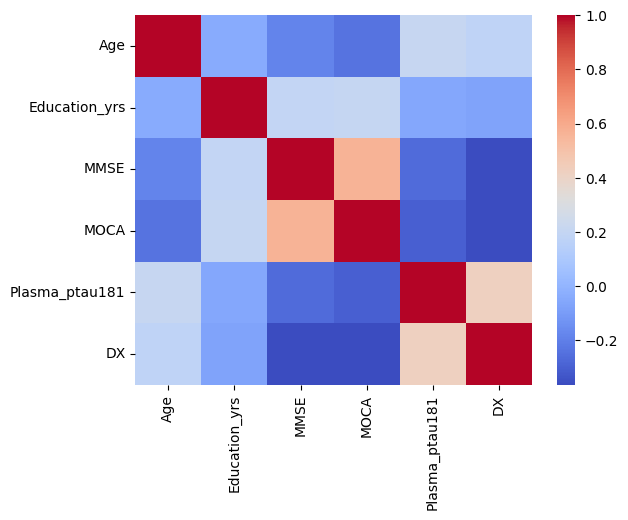

In [38]:
heat_adni = sns.heatmap(num_adni.corr(method = 'spearman', numeric_only = True), cmap = 'coolwarm')

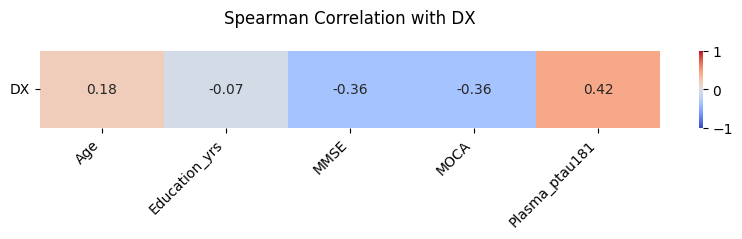

,spearman_corr,p_value,significant
MMSE,-0.363522,2.136522e-21,True
MOCA,-0.361349,3.828945e-21,True
Age,0.175263,8.341315e-06,True
Plasma_ptau181,0.424149,2.724788e-29,True


In [39]:
dt.numerical_correlation_spearman(num_adni, 'DX', annot = True, significant_only = True)

In [40]:
# Mann-Whitney U
dt.categorical_numerical_test(num_adni, 'DX')

,u_stat,p_value,significant
Age,60982.5,9.569204e-06,True
Education_yrs,46585.0,7.349485e-02,False
MMSE,29768.5,4.236975e-20,True
MOCA,29547.0,7.043709e-20,True
Plasma_ptau181,75600.5,8.824003e-27,True


In [41]:
# Mann-Whitney U
dt.categorical_numerical_test(num_adni, 'DX', significant_only = True)

,u_stat,p_value,significant
Age,60982.5,9.569204e-06,True
MMSE,29768.5,4.236975e-20,True
MOCA,29547.0,7.043709e-20,True
Plasma_ptau181,75600.5,8.824003e-27,True


Summary:

* 'MMSE', 'MOCA' and 'Education_yers' seem to be negatively correlated to AD diagnosis.
* 'Plasma_ptau181' and 'Age' seem to be positively correlated to AD diagnosis.
* The correlation of 'MMSE', 'MOCA', 'Plasma_ptau181' and 'Age' with AD diagnosis seems to be statistically significant and will be studied in more detail.
* The correlations in this dataset seem congruent with the ones from the biomarker data.